In [38]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.set_option('max_colwidth', 800)

# Gathering Data

In [39]:
# Open twitter archive csv file
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archives.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [40]:
twitter_archives.shape

(2356, 17)

In [41]:
# Download image predictions file programmatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [42]:
with open ('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [43]:
# read tsv file 
predictions = pd.read_table('image_predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [44]:
predictions.shape

(2075, 12)

In [9]:
# Query Twitter Data

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [10]:
# Using the tweet IDs in the WeRateDogs Twitter archive to query the Twitter API 
# However from the results it appeared that there is a problem with the tweet id
# The query is unable to match id and stored all the id in the error list

tweet_archives_list = []
errors_archives = []

for tw_id in twitter_archives['tweet_id']:
    tweet_data = {}
    try: 
        info = api.get_status(tw_id, tweet_mode='extended')
        tweet_data['tweet_id'] = tw_id
        tweet_data['retweet_count'] = info._json['retweet_count']
        tweet_data['favorite_count'] = info._json['favorite_count']
        tweet_archives_list.append(tweet_data)
        
    except Exception as e:
            errors_archives.append(tw_id)

Rate limit reached. Sleeping for: 305
Rate limit reached. Sleeping for: 738
Rate limit reached. Sleeping for: 737


In [14]:
# List the errors for information
errors_archives

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464]

In [15]:
# Transform tweet list into panda dataframe
tweet_archives_list = pd.DataFrame(tweet_archives_list)
tweet_archives_list.head()

,favorite_count,retweet_count,tweet_id
0,38827,8595,892420643555336193
1,33260,6316,892177421306343426
2,25056,4192,891815181378084864
3,42206,8707,891689557279858688
4,40353,9480,891327558926688256


In [16]:
# Save the dataframe into 'tweet_json.txt'
tweet_archives_list.to_csv('tweet_json.txt', encoding = 'utf-8')

In [18]:
# Open 'tweet_json.txt' file
tweet_archives_list = pd.read_csv('tweet_json.txt')
tweet_archives_list.head()

,Unnamed: 0,favorite_count,retweet_count,tweet_id
0,0,38827,8595,892420643555336193
1,1,33260,6316,892177421306343426
2,2,25056,4192,891815181378084864
3,3,42206,8707,891689557279858688
4,4,40353,9480,891327558926688256


In [19]:
# Delete the first column "unnamed: 0"
tweet_archives_list = tweet_archives_list.drop(['Unnamed: 0'],1)
tweet_archives_list.head()

,favorite_count,retweet_count,tweet_id
0,38827,8595,892420643555336193
1,33260,6316,892177421306343426
2,25056,4192,891815181378084864
3,42206,8707,891689557279858688
4,40353,9480,891327558926688256


In [20]:
# Check the dimension
tweet_archives_list.shape

(2345, 3)

In [23]:
# Merge the difference data to create one for analysis
merged_data = pd.merge(twitter_archives, predictions, how='left', on='tweet_id')
merged_data = pd.merge(merged_data, tweet_archives_list, how='left', on='tweet_id')
merged_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38827.0,8595.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33260.0,6316.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25056.0,4192.0


In [24]:
# Check the new dataframe dimension
merged_data.shape

(2356, 30)

In [167]:
merged_data.to_csv('merged_data.csv')

# Assessing Data 

In [45]:
merged_data = pd.read_csv('merged_data.csv')

In [46]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
Unnamed: 0                    2356 non-null int64
Unnamed: 0.1                  2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356

In [47]:
# Check if there is any row duplicated  
merged_data.duplicated().sum()

0

In [48]:
# Check if there is any tweet_id duplicated 
merged_data.duplicated(['tweet_id']).sum()

0

In [49]:
# List different numerator rating and value count
merged_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [50]:
# Check the text and rating for numerator rating over 20
numerator_rating = merged_data[(merged_data.rating_numerator > 20)]
numerator_rating [['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


In [51]:
# List different denominator rating and value count
merged_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [52]:
# Check the text and rating for denominator rating not equal to 10
denominator_rating = merged_data[(merged_data.rating_denominator != 10)]
denominator_rating [['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [53]:
merged_data.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
Buddy               7
Daisy               7
Bailey              7
Toby                7
an                  7
Jack                6
Oscar               6
Leo                 6
Stanley             6
Scout               6
Koda                6
Bella               6
Rusty               6
Dave                6
Milo                6
Jax                 6
Larry               5
Sammy               5
Phil                5
Oakley              5
Sunny               5
George              5
Gus                 5
very                5
Alfie               5
Chester             5
Louis               5
Finn                5
Bentley             5
Jeffrey             4
Hank                4
Reginald            4
Reggie    

In [54]:
merged_data.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Staffordshire_bullterrier          20
Siberian_husky                     20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Shetland_sheepdog                  18
Maltese_dog                        18
beagle                             18
teddy                              18
Rottweiler                         17
Lakeland_ter

In [55]:
merged_data.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [56]:
merged_data.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
chow                               20
malinois                           20
miniature_pinscher                 20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [57]:
merged_data.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [58]:
merged_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality Issues 
 
1. Missing data: There are 2356 different tweet id in total from the twitter archives, but 
    - missing data from the image predictions files that contained information on 2075 tweet id only. 
      those rows would need to be excluded as we want tweet with images
    - there are missing expanded_urls information (59 missing)  
    - missing data from the API query error for favorite count and retweet count. Information missing for 11 tweet id
<br> 
<br> 
2. Retweet 
    - There are 181 retweets id that need to be excluded as we care only for original tweet
    - There are also 78 tweet if identify as reply to an tweet which need to be excluded  
<br>     
3. Rating extraction issue
    - The rating extraction program did not take into account decimals
    - The rating extraction program would consider the first "/" as a rating while 24/7, 7/11 are not ratings in the context
<br>
<br>     
4. Dog Name
    - Dog name incorrectly extracted with some strange entry such as "a", "an", "the", "this"
<br> 
<br> 
5. Inconsistent expanded urls
    - Some extended urls contains two differents or duplicated urls 
    - Some also links to gofundme.com, us.blastingnews.com, facebook, youtube, google links
<br> 
<br> 
6. Wrong data type
    - The data type for timestamps should be datetime64 type instead of object
<br> 
<br> 
7. Predictions name not related to dog breeds
    - For p1, p2, p3, there are some surprising entries such as umbrella, laptop, mailbox, snail...
<br> 
<br>     
8. Suspicious sources
    - Some sources seems to come from vine.co. Is it reliable ?
    
    
### Tidiness Issues 

1. Dog stages consolidation 
    - Dog stages can be consolidated from 4 columns to one 
<br> 
<br> 
2. Merge the three dataframe based from tweet_id
    - It is something that we have already done to facilitate our assessment analysis 

# Cleaning Data

In [59]:
merged_data_clean = merged_data.copy()

## Quality Issues 

### 1. Missing image data

##### Define
We want to remove rows with no image

##### Code

In [60]:
merged_data_clean = merged_data_clean[pd.notnull(merged_data_clean['jpg_url'])]

#### Test

In [61]:
merged_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 32 columns):
Unnamed: 0                    2075 non-null int64
Unnamed: 0.1                  2075 non-null int64
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 no

### 2. Retweet

##### Define
We want to remove rows that are retweet and drop "Unnamed: 0", "retweeted_status_id","retweeted_status_user_id", "retweeted_status_timestamp" columns    

##### Code & Test

In [62]:
# remove rows that are retweet and reply of a tweet 
merged_data_clean = merged_data_clean[pd.isnull(merged_data_clean['retweeted_status_id'])]
merged_data_clean = merged_data_clean[pd.isnull(merged_data_clean['in_reply_to_status_id'])]
merged_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 32 columns):
Unnamed: 0                    1971 non-null int64
Unnamed: 0.1                  1971 non-null int64
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-nul

In [63]:
# Drop "Unnamed: 0", "retweeted_status_id","retweeted_status_user_id", "retweeted_status_timestamp" columns
merged_data_clean.drop(['Unnamed: 0','Unnamed: 0.1','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis=1, inplace=True)
merged_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

After cleaning rows that do not contains images and row that are retweet/or reply to a tweet, we end up with 1971 rows with no more missing value for extended urls, favorite_count and retweet_count

### 3. Rating extraction issue

##### Define

1. Extract ratings from text programmatically using regex and store into a list called "rating_extract"
<br>
<br>
2. Create a function to check the items in the list and sort the item into a new list "rating"
     - If there is no value in the item, append "na" to the new list 
     - if there is one value in the item but the value matches with a predefine checklist, append "na" to the new list 
       otherwise, append the value to the new list
     - if there is more than one value 
           - and if the first value is in the format of a rating with 10 as denominator, append the value to the new list
           - otherwise if the second value is in the format of a rating with 10 as denominator, append the value to the new list
           - else append "check" to the new list for user manual check
           
3. Integrate the new list value into the dataframe and perform the final cleaning for tidiness 
       

##### Code

In [64]:
rating_extract = []
merged_data_clean['text'].apply(lambda x: rating_extract.append(re.findall(r'[\d*\.,\d*]{1,10}/[\d*]{1,10}', x)))
checklist = [['24/7'], ['7/7'], ['7/11'], ['24/24'],['9/11'],['50/50']]
rating = []

for r in rating_extract:
    
    if len(r) == 0:
        rating.append('na')
        
    elif len(r) == 1:
        
        if r in checklist:
             rating.append('na')
        else:
             rating.append(r[0])

            
    elif len(r) > 1:
        if re.match('[\d*\.,\d*]{1,10}/10', r[0]):
            rating.append(r[0])
        elif re.match('[\d*\.,\d*]{1,10}/10', r[1]):
            rating.append(r[1])
        else:
            rating.append('Check')

# Check number of occurence of na and check 
print(rating.count('na'),rating.count('Check'))

1 0


In [65]:
# Add rating list to the dataframe
merged_data_clean['rating']= rating
merged_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38827.0,8595.0,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33260.0,6316.0,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25056.0,4192.0,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42206.0,8707.0,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,40353.0,9480.0,12/10


In [66]:
# remove row with no ratings
merged_data_clean = merged_data_clean[merged_data_clean.rating != 'na']

In [67]:
# Split the rating column into two columns: one for numerator and one for denominator
merged_data_clean['rating_numerator'], merged_data_clean['rating_denominator'] = merged_data_clean['rating'].str.split('/', 1).str

In [68]:
# Remove some extra character in the rating_num column
merged_data_clean['rating_numerator'] = merged_data_clean.rating_numerator.str.extract('(\d+)', expand=True).astype(int)

In [69]:
# Change datatype for rating_dem to int64
merged_data_clean['rating_denominator'] = merged_data_clean.rating_denominator.astype(int)

In [70]:
# Drop the old rating_numerator,rating_denominator, rating columns after cleaning
merged_data_clean = merged_data_clean.drop(['rating'], axis=1)

#### Test

In [71]:
merged_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38827.0,8595.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33260.0,6316.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25056.0,4192.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42206.0,8707.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,40353.0,9480.0


In [72]:
merged_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null object
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1970 non-null object
doggo                 1970 non-null object
floofer               1970 non-null object
pupper                1970 non-null object
puppo                 1970 non-null object
jpg_url               1970 non-null object
img_num               1970 non-null float64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null object
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null object
p3                    1970 non-nu

In [73]:
# Check rating_numerator value occurence
merged_data_clean.rating_numerator.value_counts()

12      446
10      418
11      395
13      255
9       151
8        95
7        51
14       34
5        32
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
44        1
45        1
60        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [74]:
# Check the text and rating for numerator rating over 20
numerator_rating_test = merged_data_clean[(merged_data_clean.rating_numerator > 20)]
numerator_rating_test [['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110


In [75]:
# Check rating_denominator value occurence
merged_data_clean.rating_denominator.value_counts()

10     1959
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [77]:
# Check the text and rating for denominator rating over 10
denominator_rating_test = merged_data_clean[(merged_data_clean.rating_denominator > 10)]
denominator_rating_test [['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


### 4. Dog Name

##### Define
Extract dog name based on predefined patterns
 - "This is" + dog name
 - "Meet" + dog name
 - "His/Her name is" + dog name
 - dog name + "is"
 - dog name + "here"
 - "Say hello to" + dog name
 - "here is" or "here we have" + dog name
 - "named" + dog name

#### Code

In [78]:
text = merged_data_clean['text'].tolist()

extract = []

for t in text:
    pattern_group1 = re.findall(r'This\sis\s[A-Z][a-z]*|Meet\s[A-Z][a-z]*|His\sname\sis\s[A-Z][a-z]*', t) 
    pattern_group2 = re.findall(r'Her\sname\sis\s[A-Z][a-z]*|Say\shello\sto\s[A-Z][a-z]*|Here\sis\s[A-Z][a-z]*', t) 
    pattern_group3 = re.findall(r'Here\swe\shave\s[A-Z][a-z]*|named\s[A-Z][a-z]*', t) 

    if len(pattern_group1) > 0:
        extract.append(pattern_group1[0])
    
    elif len(pattern_group2) > 0:
        extract.append(pattern_group2[0])
    
    elif len(pattern_group3) > 0:
        extract.append(pattern_group3[0])
        
    else:
        extract.append('Null')
    

In [79]:
# Replace dataframe name column by the new extracted list
merged_data_clean['name'] = extract

In [80]:
# Remove unwanted words from pattern to keep dog name only
merged_data_clean['name'] = merged_data_clean.name.str.replace(('This is '),'')
merged_data_clean['name'] = merged_data_clean.name.str.replace(('Meet '),'')
merged_data_clean['name'] = merged_data_clean.name.str.replace(('Say hello to '),'')
merged_data_clean['name'] = merged_data_clean.name.str.replace(('His name is '),'')
merged_data_clean['name'] = merged_data_clean.name.str.replace(('Her name is '),'')
merged_data_clean['name'] = merged_data_clean.name.str.replace(('Here we have '),'')
merged_data_clean['name'] = merged_data_clean.name.str.replace(('Here is '),'')
merged_data_clean['name'] = merged_data_clean.name.str.replace(('named '),'')

#### Test

In [81]:
# Check rating_denominator value occurence
merged_data_clean.name.value_counts()

Null              592
Charlie            11
Lucy               10
Cooper             10
Oliver             10
Penny               9
Tucker              9
Sadie               8
Winston             8
Daisy               7
Lola                7
Toby                7
Jax                 6
Bella               6
Stanley             6
Bo                  6
Koda                6
Milo                5
Oscar               5
Buddy               5
Zoey                5
Louis               5
Leo                 5
Scout               5
Bailey              5
Chester             5
Dave                5
Rusty               5
Chip                4
Gary                4
Gus                 4
Duke                4
Bear                4
Reggie              4
Oakley              4
Brody               4
Finn                4
Bentley             4
Archie              4
Winnie              4
Cassie              4
Alfie               4
Sophie              4
Scooter             4
Larry               4
Jerry     

In [82]:
# Compare text and name column
name_null = merged_data_clean[(merged_data_clean.name == 'Null')]
name_null[['text','name']]

,text,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,Null
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,Null
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,Null
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,Null
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,Null
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,Null
37,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,Null
41,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",Null
47,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",Null
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,Null


### 5. Inconsistent expanded urls

##### Define

Expanded urls have all the same pattern to be extracted.

#### Code

In [83]:
# Extract url based with regex
merged_data_clean['clean_expanded_urls'] = merged_data_clean['expanded_urls'].str.extract('(https://twitter.com/dog_rates/status/\d{1,18}/photo/1)', expand=True)

In [84]:
# Drop the old expanded_urls column
merged_data_clean = merged_data_clean.drop(['expanded_urls'], axis=1)

#### Test

In [85]:
# Provide 5 random sample for checking
merged_data_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,clean_expanded_urls
1003,747844099428986880,2016-06-28 17:28:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz,11,10,Huxley,None,None,None,None,https://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg,1.0,Pembroke,0.360428,True,papillon,0.263134,True,Chihuahua,0.131246,True,3020.0,823.0,https://twitter.com/dog_rates/status/747844099428986880/photo/1
573,801167903437357056,2016-11-22 20:58:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Milo. I would do terrible things for Milo. 13/10 https://t.co/R6wJyC2Tey,13,10,Milo,None,None,None,None,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1.0,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True,26829.0,6729.0,https://twitter.com/dog_rates/status/801167903437357056/photo/1
779,775842724423557120,2016-09-13 23:44:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Blue. He was having an average day until his owner told him about Bront. 12/10 h*ckin hysterical af https://t.co/saRYTcxQeH,12,10,Blue,None,None,None,None,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2.0,chow,0.520022,True,bath_towel,0.028775,False,French_bulldog,0.025990,True,12746.0,3010.0,https://twitter.com/dog_rates/status/775842724423557120/photo/1
1770,678341075375947776,2015-12-19 22:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper likes tape. 12/10 https://t.co/cSp6w5GWgm,12,10,Null,None,None,pupper,None,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1.0,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True,1839.0,589.0,https://twitter.com/dog_rates/status/678341075375947776/photo/1
963,750719632563142656,2016-07-06 15:54:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af https://t.co/WS6BoApYyL,12,10,Meyer,None,None,None,None,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1.0,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True,14283.0,5595.0,https://twitter.com/dog_rates/status/750719632563142656/photo/1


### 6. Wrong Data Type

#### Define

Change timestamp datatype to datetime

#### Code

In [86]:
merged_data_clean['timestamp'] = pd.to_datetime(merged_data_clean['timestamp'])

#### Test

In [87]:
merged_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id               1970 non-null int64
timestamp              1970 non-null datetime64[ns]
source                 1970 non-null object
text                   1970 non-null object
rating_numerator       1970 non-null int64
rating_denominator     1970 non-null int64
name                   1970 non-null object
doggo                  1970 non-null object
floofer                1970 non-null object
pupper                 1970 non-null object
puppo                  1970 non-null object
jpg_url                1970 non-null object
img_num                1970 non-null float64
p1                     1970 non-null object
p1_conf                1970 non-null float64
p1_dog                 1970 non-null object
p2                     1970 non-null object
p2_conf                1970 non-null float64
p2_dog                 1970 non-null object
p3                     1970 non-null object
p3_co

### 7. Prediction names not related to dog breeds

#### Define

Compare p1, p2, p3 columns with a list of dog breeds. 
 - if p1, p2 or p3 values different from the list, then change value to "not-recognized"
 - otherwise keep the value

#### Code

In [88]:
# Download a dog breed list information from internet
url2 = 'https://raw.githubusercontent.com/ericdrowell/DogBreedChart/master/dogs.json'
r = requests.get(url2)

In [89]:
with open ('dogs.json', 'wb') as file:
    file.write(r.content)

In [90]:
with open('dogs.json') as f:
    breed = json.load(f)

In [91]:
# Extract the only the name list 
# We choose id here as it is already in lower case and would be easier for comparison with dataframe value

dog_breeds = []
for i in range (0, len (breed['breeds'])):
    dog_breeds.append(breed['breeds'][i]['id'])
    
dog_breeds 

['affenpinscher',
 'afghan-hound',
 'airedale-terrier',
 'akita',
 'alaskan-malamute',
 'american-english-coonhound',
 'american-eskimo-dog',
 'american-foxhound',
 'american-pit-bull-terrier',
 'american-water-spaniel',
 'anatolian-shepherd-dog',
 'appenzeller-sennenhunde',
 'australian-cattle-dog',
 'australian-shepherd',
 'australian-terrier',
 'azawakh',
 'barbet',
 'basenji',
 'basset-hound',
 'beagle',
 'bearded-collie',
 'bedlington-terrier',
 'belgian-malinois',
 'belgian-sheepdog',
 'belgian-tervuren',
 'berger-picard',
 'bernese-mountain-dog',
 'bichon-frise',
 'black-and-tan-coonhound',
 'black-russian-terrier',
 'bloodhound',
 'bluetick-coonhound',
 'bolognese',
 'border-collie',
 'border-terrier',
 'borzoi',
 'boston-terrier',
 'bouvier-des-flandres',
 'boxer',
 'boykin-spaniel',
 'bracco-italiano',
 'briard',
 'brittany',
 'brussels-griffon',
 'bull-terrier',
 'bulldog',
 'bullmastiff',
 'cairn-terrier',
 'canaan-dog',
 'cane-corso',
 'cardigan-welsh-corgi',
 'catahoula-l

In [92]:
# change p1, p2, p3 format same as the dog breed list
merged_data_clean['p1'] = merged_data_clean.p1.str.lower()
merged_data_clean['p1'] = merged_data_clean.p1.str.replace(('_'),'-')
merged_data_clean['p2'] = merged_data_clean.p2.str.lower()
merged_data_clean['p2'] = merged_data_clean.p2.str.replace(('_'),'-')
merged_data_clean['p3'] = merged_data_clean.p3.str.lower()
merged_data_clean['p3'] = merged_data_clean.p3.str.replace(('_'),'-')

In [93]:
merged_data_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,clean_expanded_urls
1383,700847567345688576,2016-02-20 01:00:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Crouton. He's a Galapagos Boonwiddle. Has a legendary tongue (most Boonwiddles do). Excellent stuff 10/10 https://t.co/110Eeg7KW3,10,10,Crouton,None,None,None,None,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1.0,rhodesian-ridgeback,0.252514,True,redbone,0.153005,True,whippet,0.135199,True,2605.0,545.0,https://twitter.com/dog_rates/status/700847567345688576/photo/1
1178,719551379208073216,2016-04-11 15:43:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harnold. He accidentally opened the front facing camera. 10/10 get it together Harnold https://t.co/S6JHaSMtln,10,10,Harnold,None,None,None,None,https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg,1.0,malamute,0.873233,True,siberian-husky,0.076435,True,eskimo-dog,0.035745,True,5389.0,2115.0,https://twitter.com/dog_rates/status/719551379208073216/photo/1
2233,668204964695683073,2015-11-21 23:10:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ron. Ron's currently experiencing a brain freeze. Damn it Ron. 8/10 https://t.co/4ilfcR5SlK,8,10,Ron,None,None,None,None,https://pbs.twimg.com/media/CUXw3qHWoAAk8HJ.jpg,1.0,labrador-retriever,0.655180,True,golden-retriever,0.107884,True,chesapeake-bay-retriever,0.065835,True,572.0,204.0,https://twitter.com/dog_rates/status/668204964695683073/photo/1
471,816697700272001025,2017-01-04 17:27:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Binky. She appears to be rather h*ckin cozy. Nifty leg cross as well. 12/10 would snug well https://t.co/WFt82XLyEF,12,10,Binky,None,None,None,None,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1.0,chihuahua,0.756992,True,pomeranian,0.052850,True,maltese-dog,0.047608,True,10667.0,2471.0,https://twitter.com/dog_rates/status/816697700272001025/photo/1
350,831552930092285952,2017-02-14 17:17:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse,13,10,Dutch,None,None,None,None,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1.0,chihuahua,0.257415,True,pembroke,0.161442,True,french-bulldog,0.092143,True,9691.0,2555.0,https://twitter.com/dog_rates/status/831552930092285952/photo/1


In [94]:
# Function to compare p1, p2, p3 column values to the dog breed list

pn = ['p1','p2','p3']

for p in pn:
    comparison = merged_data_clean[p].tolist()
    clean_p = []
    
    for i in comparison:
        if i in dog_breeds:
            clean_p.append(i)
        else:
            clean_p.append('not-recognized')
    
    merged_data_clean[p] = clean_p

In [95]:
# Drop p1_dog, p2_dog, p3_dog that indicate whether the prediction is a dog breed
merged_data_clean = merged_data_clean.drop(['p1_dog','p2_dog', 'p3_dog'], axis=1)

#### Test

In [96]:
# Check value occurence for p1
merged_data_clean.p1.value_counts()

not-recognized                 986
golden-retriever               136
labrador-retriever              94
chihuahua                       78
pug                             54
samoyed                         40
pomeranian                      38
cocker-spaniel                  27
french-bulldog                  26
chesapeake-bay-retriever        23
miniature-pinscher              21
siberian-husky                  20
shetland-sheepdog               18
beagle                          17
shih-tzu                        17
rottweiler                      16
italian-greyhound               16
lakeland-terrier                15
kuvasz                          15
great-pyrenees                  14
west-highland-white-terrier     14
vizsla                          13
border-collie                   12
dalmatian                       12
old-english-sheepdog            11
bernese-mountain-dog            10
collie                          10
boxer                           10
soft-coated-wheaten-

In [97]:
# Check value occurence for p2
merged_data_clean.p2.value_counts()

not-recognized                 1024
labrador-retriever               95
golden-retriever                 82
chihuahua                        43
chesapeake-bay-retriever         40
french-bulldog                   39
pomeranian                       38
siberian-husky                   33
cocker-spaniel                   32
beagle                           27
collie                           26
kuvasz                           24
italian-greyhound                22
miniature-pinscher               20
norwegian-elkhound               19
samoyed                          17
pug                              17
shih-tzu                         16
irish-terrier                    16
tibetan-mastiff                  14
great-pyrenees                   14
whippet                          14
boxer                            13
west-highland-white-terrier      13
black-and-tan-coonhound          12
shetland-sheepdog                12
border-collie                    11
irish-setter                

In [98]:
# Check value occurence for p3
merged_data_clean.p3.value_counts()

not-recognized                 1068
labrador-retriever               75
chihuahua                        57
golden-retriever                 45
kuvasz                           31
beagle                           29
cocker-spaniel                   29
pomeranian                       27
great-pyrenees                   25
french-bulldog                   25
chesapeake-bay-retriever         24
pug                              21
basenji                          20
siberian-husky                   19
shetland-sheepdog                16
boxer                            16
lakeland-terrier                 16
miniature-pinscher               14
saluki                           14
tibetan-mastiff                  14
weimaraner                       13
west-highland-white-terrier      13
collie                           13
bloodhound                       12
norfolk-terrier                  12
tibetan-terrier                  11
keeshond                         11
english-setter              

### 8. Suspicious sources

### Define

For sources from "vine.co", replace by nothing 

#### Code

In [99]:
merged_data_clean['source'] = \
    merged_data_clean.source.str.replace(('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'),'N/A')

#### Test

In [100]:
merged_data_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1931
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Tidiness Issues

### Dog stages consolidation

#### Define

Extract the dog stage from text column and consolidate into one column



#### Code

In [101]:
dog_stage = []

text = merged_data_clean['text'].tolist()

for t in text:
    stage = re.findall(r'doggo|floofer|pupper|puppo', t) 
    if len(stage) == 0:
        dog_stage.append('None')
    else:
        dog_stage.append(stage[0])

        
merged_data_clean['dog_stage'] = dog_stage

In [102]:
# Drop the doggo, floofer, pupper,puppo columns
merged_data_clean = merged_data_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1)

#### Test

In [103]:
merged_data_clean.dog_stage.value_counts()

None       1648
pupper      220
doggo        71
puppo        28
floofer       3
Name: dog_stage, dtype: int64

In [104]:
merged_data_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,favorite_count,retweet_count,clean_expanded_urls,dog_stage
748,779377524342161408,2016-09-23 17:50:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Have you ever seen such a smol pupper? Portable af. 12/10 would keep in shirt pocket https://t.co/KsqaIzlQ12,12,10,Null,https://pbs.twimg.com/ext_tw_video_thumb/779377444025499652/pu/img/eIiLDy9F6rPNarEc.jpg,1.0,not-recognized,0.170921,not-recognized,0.060359,not-recognized,0.054981,9633.0,3504.0,NaN,pupper
80,877316821321428993,2017-06-21 00:06:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc",13,10,Dante,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1.0,saluki,0.509967,italian-greyhound,0.090497,golden-retriever,0.079406,27405.0,5238.0,https://twitter.com/dog_rates/status/877316821321428993/photo/1,None
1223,714251586676113411,2016-03-28 00:43:43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Thumas. He hates potted plants. 8/10 wtf Thumas https://t.co/rDVueNIcEi,8,10,Thumas,https://pbs.twimg.com/media/CemIBt4WwAQqhVV.jpg,2.0,soft-coated-wheaten-terrier,0.751962,bedlington-terrier,0.175652,great-pyrenees,0.011452,3487.0,918.0,https://twitter.com/dog_rates/status/714251586676113411/photo/1,None
1366,702671118226825216,2016-02-25 01:47:04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Rambo &amp; Kiwi. Rambo's the pup with the sharp toes &amp; rad mohawk. One stays woke while one sleeps. 10/10 for both https://t.co/MpH1Fe9LhZ,10,10,Rambo,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1.0,bloodhound,0.381227,sussex-spaniel,0.212017,not-recognized,0.128622,2345.0,613.0,https://twitter.com/dog_rates/status/702671118226825216/photo/1,None
2028,671866342182637568,2015-12-02 01:39:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Dylan. He can use a fork but clearly can't put on a sweatshirt correctly. Looks like a disgruntled teen. 10/10 https://t.co/FWJQ1zQLiI,10,10,Dylan,https://pbs.twimg.com/media/CVLy3zFWoAA93qJ.jpg,1.0,labrador-retriever,0.875614,chihuahua,0.032182,golden-retriever,0.017232,1168.0,530.0,https://twitter.com/dog_rates/status/671866342182637568/photo/1,None


# Storing

In [105]:
merged_data_clean.to_csv('twitter_archive_master.csv')

# Insight

In [108]:
insight = pd.read_csv('twitter_archive_master.csv')
insight = insight.drop(['Unnamed: 0'], axis=1)
insight.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,favorite_count,retweet_count,clean_expanded_urls,dog_stage
848,729823566028484608,2016-05-10 00:01:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stefan. He's a downright remarkable pup. 13/10 https://t.co/Ebjt6Y4fMh,13,10,Stefan,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1.0,not-recognized,0.218408,not-recognized,0.114368,not-recognized,0.096409,4263.0,1358.0,https://twitter.com/dog_rates/status/729823566028484608/photo/1,None
218,837482249356513284,2017-03-03 01:58:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Waffles. He's a ship captain in real life and in @GoodDogsGame. Must've gotten to the max level (wink) 13/10 would sail with https://t.co/Z3LAaV2pKz,13,10,Waffles,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2.0,not-recognized,0.541196,not-recognized,0.121094,not-recognized,0.056137,4112.0,488.0,https://twitter.com/dog_rates/status/837482249356513284/photo/1,None
1964,666050758794694657,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,10,10,Null,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1.0,bernese-mountain-dog,0.651137,not-recognized,0.263788,greater-swiss-mountain-dog,0.016199,132.0,58.0,https://twitter.com/dog_rates/status/666050758794694657/photo/1,None
513,783821107061198850,2016-10-06 00:08:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mairi. She has mastered the art of camouflage. 12/10 h*ckin sneaky af https://t.co/STcPjiNAHp,12,10,Mairi,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1.0,lakeland-terrier,0.265659,golden-retriever,0.196414,not-recognized,0.133534,8046.0,2216.0,https://twitter.com/dog_rates/status/783821107061198850/photo/1,None
1046,703769065844768768,2016-02-28 02:29:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're trying to watch your favorite tv show but your friends keep interrupting. 10/10 relatable af https://t.co/QQZDCYl6zT,10,10,Null,https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg,2.0,boxer,0.838994,greater-swiss-mountain-dog,0.088800,not-recognized,0.031684,3527.0,1242.0,https://twitter.com/dog_rates/status/703769065844768768/photo/1,None


### Dog Stages Popularity

What are the most popular dog stages ? However are they rated by tweeters ? Which one have the most favorite counts and retweet counts ? 

From the different analysis performed below, we can note that the dog stage description is available:
- Puppers are the most popular stage type among tweet poster (Pupper: 68%, Doggo: 22%, Puppo: 9%, Floofer:1%)
- Maybe due to a larger number of posts, puppers and doggos rating means tend to be lower than puppo and floofer
- The observation is the same for favorite counts and retweet counts. The favorite counts and retweet counts means are lower for pupper, the boxplot is also smaller despite outliers
- Based on the descriptive statistics available, we would say that Puppo and Floofer would have relatively better / stable ratings from the tweeter author with a ratio around 1.2 / 1.3. And maybe because these dog stages are less frequent on dog_rates, they have in average more favorite and retweet counts   


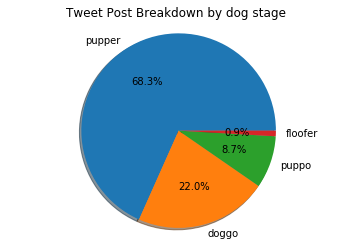

In [109]:
# create a new column to calculate the rating ratio as some ratings use a denominator different than 10
insight['rating_ratio']= insight['rating_numerator']/ insight['rating_denominator']

# Create a dataframe that contains dog stage information 
dog_stage = insight[(insight.dog_stage != 'None')]

# Boxplot to visualise rating ratio allocation by dog stage
dog_stage.dog_stage.value_counts(normalize = True).plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Tweet Post Breakdown by dog stage ')
plt.axis('equal')
plt.ylabel('')
plt.show()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

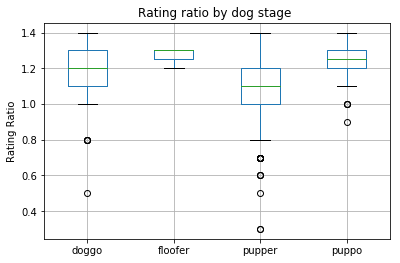

In [110]:
# Boxplot to visualise rating ratio allocation by dog stage
dog_stage.boxplot(column='rating_ratio', by='dog_stage')
plt.title('Rating ratio by dog stage ')
plt.xlabel('')
plt.ylabel('Rating Ratio')
plt.suptitle("")

In [111]:
# Descriptive statistics for favorite_count by dog stage
dog_stage['rating_ratio'].groupby(dog_stage['dog_stage']).describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,71.0,1.164789,0.164836,0.5,1.10,1.20,1.3,1.4
floofer,3.0,1.266667,0.057735,1.2,1.25,1.30,1.3,1.3
pupper,220.0,1.057273,0.181802,0.3,1.00,1.10,1.2,1.4
puppo,28.0,1.214286,0.120844,0.9,1.20,1.25,1.3,1.4


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

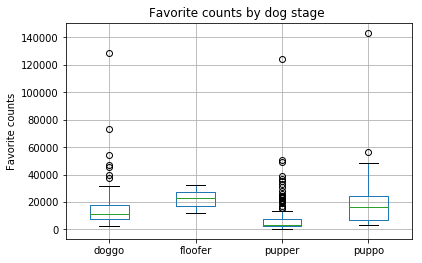

In [112]:
# Boxplot to visualise favorite count by dog stage
dog_stage.boxplot(column='favorite_count', by='dog_stage')
plt.title('Favorite counts by dog stage ')
plt.xlabel('')
plt.ylabel('Favorite counts')
plt.suptitle("")

In [113]:
# Descriptive statistics for favorite_count by dog stage
dog_stage['favorite_count'].groupby(dog_stage['dog_stage']).describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,71.0,16579.676056,18616.926590,2533.0,7865.50,11465.0,18008.00,128366.0
floofer,3.0,22486.666667,10244.305361,12197.0,17387.50,22578.0,27631.50,32685.0
pupper,220.0,7078.859091,11475.414999,336.0,2326.75,3154.0,7301.75,124479.0
puppo,28.0,23178.750000,27598.889038,3209.0,7128.75,16204.5,24705.00,143493.0


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0.98,'')

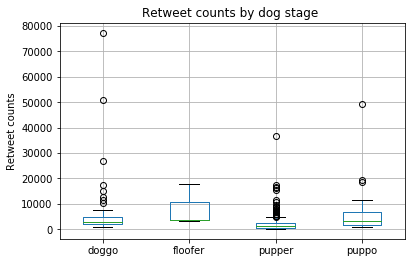

In [114]:
# Boxplot to visualise retweet count by dog stage
dog_stage.boxplot(column='retweet_count', by='dog_stage')
plt.title('Retweet counts by dog stage ')
plt.xlabel('')
plt.ylabel('Retweet counts')
plt.suptitle("")

In [115]:
# Descriptive statistics for favorite_count by dog stage
dog_stage['retweet_count'].groupby(dog_stage['dog_stage']).describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,71.0,5830.154930,11059.886200,699.0,1926.00,2992.0,4785.5,77409.0
floofer,3.0,8266.666667,8373.308327,3157.0,3435.00,3713.0,10821.5,17930.0
pupper,220.0,2280.122727,3615.240845,89.0,671.25,1119.5,2365.5,36527.0
puppo,28.0,6726.392857,9646.891084,692.0,1710.25,3375.0,6826.0,49168.0


### Dog Breed Prediction

We then analyse the dog breed prediction algorithm that determine the dog breed based on posted image. 
We noted that on the prediction, the algorithm was not able to recognize the dog breed easily. 
As per summary table below, 
- for the dog breed recognition success rate for the first prediction is 50/50 
- for the second and third predictions, the result are slightly lower
This may be because the dog images are sometimes often mixed with other elements such as donut which make the image recognitions more difficult. 

Then we checked the top 10 dog breed recognition for prediction 1, 2 and 3. This does not assure that the prediction match with the images but we can see 3 majors dog breeds that stands out for the three levels of predictions : Golden retriever, Labrador Retriever and Chihuahua. Is it because the algorithm is more trained to recognize this type of dog breed or because these are the most popular dog breed at the moment ? It is a question that can be interesting to continue to investigate.

The prediction confidence for top 10 breeds for p1 is 66%, for p2 is 18% and for p3 8%. 

In [116]:
# Create a dataframe that summarize the algorithm success rate to recognize a dog breed based on tweet image
p1_not_recognized = insight.p1.value_counts()['not-recognized']/len(insight)
p1_recognized = 1 - p1_not_recognized
p2_not_recognized = insight.p2.value_counts()['not-recognized']/len(insight)
p2_recognized = 1 - p2_not_recognized
p3_not_recognized = insight.p3.value_counts()['not-recognized']/len(insight)
p3_recognized = 1 - p3_not_recognized

p = {'Prediction_1': [p1_recognized, p1_not_recognized], \
     'Prediction_2': [p2_recognized, p2_not_recognized], \
     'Prediction_3': [p3_recognized, p3_not_recognized] }

Dog_Breed_Recognition = pd.DataFrame(p,columns=['Prediction_1','Prediction_2','Prediction_3'], \
                          index=['Dog Breed Recognized', 'Dog Breed Not Recognized'])
Dog_Breed_Recognition

,Prediction_1,Prediction_2,Prediction_3
Dog Breed Recognized,0.499492,0.480203,0.457868
Dog Breed Not Recognized,0.500508,0.519797,0.542132


Text(0.5,0,'Count')

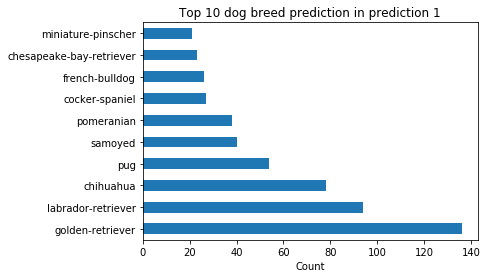

In [129]:
# Top 10 dog breed prediction in p1
Prediction_1 = insight[(insight.p1 != 'not-recognized')]
Prediction_1.p1.value_counts().nlargest(10).plot.barh()
plt.title('Top 10 dog breed prediction in prediction 1')
plt.xlabel('Count')

In [118]:
# Descriptive statistic these top 10 dog breed prediction for p1
Prediction_1['p1_conf'].groupby(Prediction_1['p1']).nlargest(10).describe()

count    477.000000
mean       0.665469
std        0.264478
min        0.044333
25%        0.447803
50%        0.697480
75%        0.918144
max        0.999956
Name: p1_conf, dtype: float64

Text(0.5,0,'Count')

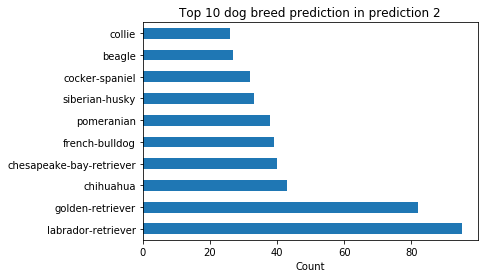

In [130]:
# Top 10 dog breed prediction in p2
Prediction_2 = insight[(insight.p2 != 'not-recognized')]
Prediction_2.p2.value_counts().nlargest(10).plot.barh()
plt.title('Top 10 dog breed prediction in prediction 2')
plt.xlabel('Count')

In [120]:
# Descriptive statistic these top 10 dog breed prediction for p2
Prediction_2['p2_conf'].groupby(Prediction_2['p2']).nlargest(10).describe()

count    495.000000
mean       0.184136
std        0.106409
min        0.000046
25%        0.107930
50%        0.179918
75%        0.251811
max        0.467678
Name: p2_conf, dtype: float64

Text(0.5,0,'Count')

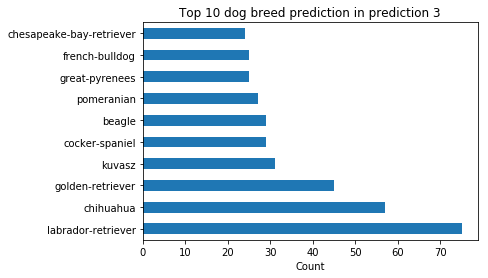

In [131]:
# Top 10 dog breed prediction in p3
Prediction_3 = insight[(insight.p3 != 'not-recognized')]
Prediction_3.p3.value_counts().nlargest(10).plot.barh()
plt.title('Top 10 dog breed prediction in prediction 3')
plt.xlabel('Count')

In [122]:
# Descriptive statistic these top 10 dog breed prediction for p3
Prediction_3['p3_conf'].groupby(Prediction_3['p3']).nlargest(10).describe()

count    557.000000
mean       0.079194
std        0.052657
min        0.000011
25%        0.037400
50%        0.073473
75%        0.113796
max        0.270673
Name: p3_conf, dtype: float64

###  Names, ratings & popularity

We wanted to check if the dog is named can impact the ratings, favorites and retweet counts. 
- 70% of the tweets have dog names. When the tweet author presents the dog by its name, it might that it is a picture of his dog or a dog that he/she knows. 
- We can see that tweets with dog named have an average rating ratio better than tweet without dog names
- For favorite and retweet counts, the statistics are relatively better when the dog is named. Favorite and retweet counts third quartile for tweets with dog names are higher than tweets without dogs names.
- The most popular dog names are Charlie, Lucy, Oliver, Copper, Penny, Tucker

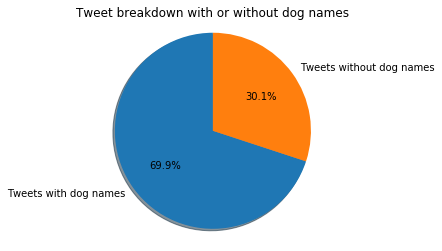

In [123]:
# Calculate percentage of tweet with or without dog names
no_dog_name = insight.name.value_counts()['Null']/len(insight)
dog_named = 1 - no_dog_name

# Pie Chart representation
labels = 'Tweets with dog names', 'Tweets without dog names'
sizes = [dog_named, no_dog_name]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal') 
plt.title('Tweet breakdown with or without dog names')
plt.show()

In [124]:
# Create separate dataframes for tweets with and without dog names 
df_dog_named = insight[(insight.name != 'Null')]
df_dog_not_named = insight[(insight.name == 'Null')]

In [125]:
# Descriptive statistics for tweet with dog names
df_dog_named.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating_ratio
count,1.378000e+03,1378.000000,1378.0,1378.000000,1378.000000,1.378000e+03,1.378000e+03,1378.000000,1378.000000,1378.000000
mean,7.433335e+17,11.978229,10.0,1.206096,0.600606,1.343891e-01,6.034780e-02,9186.414369,2649.381713,1.197823
std,6.893695e+16,47.592919,0.0,0.568777,0.273765,1.017331e-01,5.145831e-02,11912.090853,3970.316641,4.759292
min,6.664188e+17,2.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,105.000000,22.000000,0.200000
25%,6.787808e+17,10.000000,10.0,1.000000,0.367573,5.142930e-02,1.543925e-02,2213.250000,662.000000,1.000000
50%,7.205826e+17,11.000000,10.0,1.000000,0.599557,1.183700e-01,4.929300e-02,4608.500000,1472.000000,1.100000
75%,7.996742e+17,12.000000,10.0,1.000000,0.868634,1.978602e-01,9.334248e-02,11932.750000,3224.250000,1.200000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,124479.000000,61172.000000,177.600000


In [126]:
# Descriptive statistics for tweet without dog names
df_dog_not_named.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating_ratio
count,5.920000e+02,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,7.189424e+17,12.599662,11.520270,1.192568,0.580010,0.135206,0.059799,8271.445946,2942.324324,1.089020
std,6.083721e+16,22.129832,12.328811,0.536403,0.267942,0.099539,0.049783,14165.688666,6116.995360,1.704894
min,6.660209e+17,0.000000,10.000000,1.000000,0.063152,0.000010,0.000001,79.000000,13.000000,0.000000
25%,6.739443e+17,9.750000,10.000000,1.000000,0.351625,0.060076,0.017109,1497.250000,544.750000,0.900000
50%,6.906497e+17,11.000000,10.000000,1.000000,0.580437,0.115546,0.049527,3171.500000,1102.500000,1.100000
75%,7.484039e+17,12.000000,10.000000,1.000000,0.819369,0.190076,0.086856,8138.500000,2751.000000,1.200000
max,8.910880e+17,420.000000,170.000000,4.000000,0.999984,0.464816,0.255182,143493.000000,77409.000000,42.000000


Text(0.5,0,'Count')

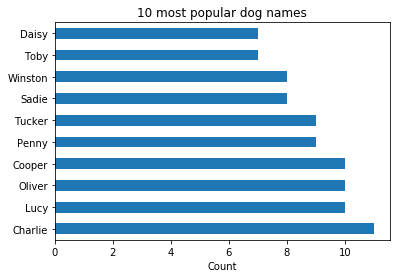

In [132]:
# Most popular dog names
df_dog_named.name.value_counts().nlargest(10).plot.barh()
plt.title('10 most popular dog names')
plt.xlabel('Count')